In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
print(os.getcwd())

c:\FCD\Projects\LeagueOfLegends


Importing data

In [3]:
data = pd.read_csv('data/games.csv')
df = data.copy()

In [4]:
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [5]:
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [6]:
# 51490 Registros
df.shape

(51490, 61)

Importing champ and summoners spells dict

In [7]:
dict1 = pd.read_json('data/champion_info.json')
dict2 = pd.read_json('data/champion_info_2.json')

In [8]:
type(dict1)

pandas.core.frame.DataFrame

In [9]:
dict1.head()

,type,version,data
1,champion,7.17.2,"{'title': 'the Dark Child', 'id': 1, 'key': 'A..."
10,champion,7.17.2,"{'title': 'The Judicator', 'id': 10, 'key': 'K..."
101,champion,7.17.2,"{'title': 'the Magus Ascendant', 'id': 101, 'k..."
102,champion,7.17.2,"{'title': 'the Half-Dragon', 'id': 102, 'key':..."
103,champion,7.17.2,"{'title': 'the Nine-Tailed Fox', 'id': 103, 'k..."


In [10]:
# Vamos fazer a leitura da coluna 'data', que tem seu conteúdo no tipo dicionario
champInfo1 = pd.read_json((dict1['data']).to_json(), orient = 'index')
champInfo1.head()

,title,id,key,name
1,the Dark Child,1,Annie,Annie
10,The Judicator,10,Kayle,Kayle
101,the Magus Ascendant,101,Xerath,Xerath
102,the Half-Dragon,102,Shyvana,Shyvana
103,the Nine-Tailed Fox,103,Ahri,Ahri


In [11]:
# orient = 'index' : dict like {index -> {column -> value}}
champInfo2 = pd.read_json((dict2['data']).to_json(), orient= 'index')
champInfo2.head()

,tags,title,id,key,name
Aatrox,"[Fighter, Tank]",the Darkin Blade,266,Aatrox,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Akali,[Assassin],the Fist of Shadow,84,Akali,Akali
Alistar,"[Tank, Support]",the Minotaur,12,Alistar,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,32,Amumu,Amumu


In [12]:
# Removendo a linha acima
# champInfo.drop(champInfo[(champInfo.name == 'None')].index, axis = 0, inplace=  True)

In [13]:
champInfo2[(champInfo2.index == 'MonkeyKing')]

,tags,title,id,key,name
MonkeyKing,"[Fighter, Tank]",the Monkey King,62,MonkeyKing,Wukong


In [14]:
dict3 = pd.read_json('data/summoner_spell_info.json')

In [15]:
summon_spell = pd.read_json((dict3['data']).to_json(), orient = 'index')
summon_spell.head()

,id,summonerLevel,name,key,description
1,1,6,Cleanse,SummonerBoost,Removes all disables (excluding suppression an...
11,11,10,Smite,SummonerSmite,Deals 390-1000 true damage (depending on champ...
12,12,6,Teleport,SummonerTeleport,"After channeling for 4.5 seconds, teleports yo..."
13,13,1,Clarity,SummonerMana,Restores 50% of your champion's maximum Mana. ...
14,14,10,Ignite,SummonerDot,"Ignites target enemy champion, dealing 70-410 ..."


## Manipulação de Dados

In [16]:
champCols = ['t1_champ1id', 't1_champ2id','t1_champ3id','t1_champ4id', 't1_champ5id',
            't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id']

banCols = ['t1_ban1', 't1_ban2', 't1_ban3','t1_ban4', 't1_ban5',
           't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5']

sumCols = ['t1_champ1_sum1', 't1_champ1_sum2', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3_sum1', 't1_champ3_sum2',
           't1_champ4_sum1', 't1_champ4_sum2','t1_champ5_sum1', 't1_champ5_sum2','t2_champ1_sum1', 't2_champ1_sum2',
           't2_champ2_sum1', 't2_champ2_sum2','t2_champ3_sum1', 't2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2',
           't2_champ5_sum1', 't2_champ5_sum2']

In [17]:
champInfo2.head()

,tags,title,id,key,name
Aatrox,"[Fighter, Tank]",the Darkin Blade,266,Aatrox,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Akali,[Assassin],the Fist of Shadow,84,Akali,Akali
Alistar,"[Tank, Support]",the Minotaur,12,Alistar,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,32,Amumu,Amumu


In [18]:
# Função para transformar os ID's em nomes

def idToName(ID, dic):
    '''
    ID: ID do campeão da maneira em que se encontra no dataframe original
    dic: dicionario que contem as informações dos campeões (nome e seu respectivo ID)

    converter o ID para nome
    '''
    champ = dic['name'][ID]
    return champ

In [19]:
champInfo2['tags'][22]

['Marksman']

In [20]:
champInfo2 = champInfo2.set_index('id')
champInfo2.head()

,tags,title,key,name
id,,,,
266,"[Fighter, Tank]",the Darkin Blade,Aatrox,Aatrox
103,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri,Ahri
84,[Assassin],the Fist of Shadow,Akali,Akali
12,"[Tank, Support]",the Minotaur,Alistar,Alistar
32,"[Tank, Mage]",the Sad Mummy,Amumu,Amumu


In [21]:
for i in champCols:
    df[i] = df[i].apply(lambda x: idToName(x, champInfo2))    

In [22]:
df[champCols].head()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn


In [23]:
df[banCols].head()

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,92,40,69,119,141,114,67,43,16,51
1,51,122,17,498,19,11,67,238,51,420
2,117,40,29,16,53,157,238,121,57,28
3,238,67,516,114,31,164,18,141,40,51
4,90,64,412,25,31,86,11,201,122,18


In [24]:
for i in banCols:
    df[i] = df[i].apply(lambda x: idToName(x, champInfo2))

In [25]:
df[banCols].head()

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn
1,Caitlyn,Darius,Teemo,Xayah,Warwick,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,Lulu,Janna,Twitch,Soraka,Blitzcrank,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,Zed,Vayne,Ornn,Fiora,Cho'Gath,Camille,Tristana,Kayn,Janna,Caitlyn
4,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,Garen,Master Yi,Braum,Darius,Tristana


In [26]:
summon_spell.head()

,id,summonerLevel,name,key,description
1,1,6,Cleanse,SummonerBoost,Removes all disables (excluding suppression an...
11,11,10,Smite,SummonerSmite,Deals 390-1000 true damage (depending on champ...
12,12,6,Teleport,SummonerTeleport,"After channeling for 4.5 seconds, teleports yo..."
13,13,1,Clarity,SummonerMana,Restores 50% of your champion's maximum Mana. ...
14,14,10,Ignite,SummonerDot,"Ignites target enemy champion, dealing 70-410 ..."


In [27]:
summon_spell = summon_spell.set_index('id')

In [28]:
summon_spell.head()

,summonerLevel,name,key,description
id,,,,
1,6,Cleanse,SummonerBoost,Removes all disables (excluding suppression an...
11,10,Smite,SummonerSmite,Deals 390-1000 true damage (depending on champ...
12,6,Teleport,SummonerTeleport,"After channeling for 4.5 seconds, teleports yo..."
13,1,Clarity,SummonerMana,Restores 50% of your champion's maximum Mana. ...
14,10,Ignite,SummonerDot,"Ignites target enemy champion, dealing 70-410 ..."


In [29]:
df[sumCols].head()

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,12,4,3,4,4,7,11,6,4,14,11,4,4,7,6,4,14,4,4,3
1,7,4,12,4,4,3,4,14,4,11,4,12,4,14,11,4,4,14,4,7
2,4,7,11,4,3,4,4,12,12,4,4,7,14,4,4,12,4,11,7,4
3,4,12,4,14,4,7,4,1,11,4,14,4,11,4,4,3,4,14,4,7
4,4,12,11,4,4,3,4,7,7,4,3,4,4,12,11,4,4,12,4,7


In [30]:
for i in sumCols:
    df[i] = df[i].apply(lambda x: idToName(x, summon_spell))

In [31]:
df[sumCols].head()

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,Teleport,Flash,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite,Smite,Flash,Flash,Heal,Ghost,Flash,Ignite,Flash,Flash,Exhaust
1,Heal,Flash,Teleport,Flash,Flash,Exhaust,Flash,Ignite,Flash,Smite,Flash,Teleport,Flash,Ignite,Smite,Flash,Flash,Ignite,Flash,Heal
2,Flash,Heal,Smite,Flash,Exhaust,Flash,Flash,Teleport,Teleport,Flash,Flash,Heal,Ignite,Flash,Flash,Teleport,Flash,Smite,Heal,Flash
3,Flash,Teleport,Flash,Ignite,Flash,Heal,Flash,Cleanse,Smite,Flash,Ignite,Flash,Smite,Flash,Flash,Exhaust,Flash,Ignite,Flash,Heal
4,Flash,Teleport,Smite,Flash,Flash,Exhaust,Flash,Heal,Heal,Flash,Exhaust,Flash,Flash,Teleport,Smite,Flash,Flash,Teleport,Flash,Heal


In [32]:
# # Visualização
# champInfo2[(champInfo2.name != champInfo2.key)].head()

In [33]:
# Agora que já temos os nomes dos campeões no dataframe original ao invés do seus ID's, iremos settar os nomes como index para criarmos as novas
# colunas com as tags
champInfo2 = champInfo2.set_index(['name'])
champInfo2.head()

,tags,title,key
name,,,
Aatrox,"[Fighter, Tank]",the Darkin Blade,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri
Akali,[Assassin],the Fist of Shadow,Akali
Alistar,"[Tank, Support]",the Minotaur,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,Amumu


In [34]:
# Função para pegar a tag do campeão no df champInfo2
def getTag(champ, dict):
    """ champ = campeão o qual será extraido a tag
        dict = tabela provinda do arquivo json de onde será extraído a tag """
    
    tag = dict['tags'][champ][0]
    return tag

In [35]:
# Criar novas colunas com as tags dos campeões selecionados
for i in champCols:
    df[i + '_tag'] = df[i].apply(lambda x : getTag(x,champInfo2))

In [36]:
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tag,t1_champ2id_tag,t1_champ3id_tag,t1_champ4id_tag,t1_champ5id_tag,t2_champ1id_tag,t2_champ2id_tag,t2_champ3id_tag,t2_champ4id_tag,t2_champ5id_tag
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


## Data Cleaning

In [37]:
# Não há valores missing
df.isna().any().sum()

0

In [38]:
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.699359,1.017537,0.372286,1.387182,0.251466,5.549466,0.985084,0.414547,1.404370,0.240105
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.799808,1.263934,0.583934,1.206818,0.433860,3.860989,1.256284,0.613768,1.224492,0.427151
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000


A coluna 'gameDuration' está em segundos. Vemos que o valor mínimo apresentado é de aproximadamente 3 min.
Jogos com tão pouca duração indicam remake da partida, que é quando algum dos jogadores não conseguem se conectar e então os player podem votar pra 
cancelar a partida. Portanto iremos retirar todos os jogos que tenham menos de 6 minutos(360seg), visto que estes jogos não foram devidamente concluidos

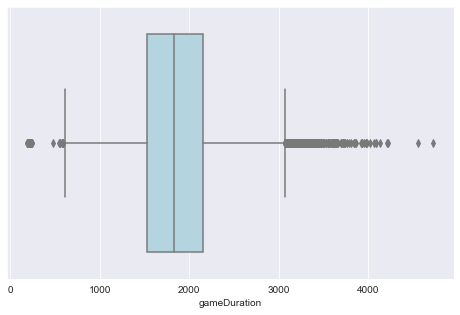

In [39]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df.gameDuration, orient = 'h', color = 'lightblue')

In [40]:
# Retirando registros em que provavelmente ocorreram surrender por inatividade
df.drop(df[(df.gameDuration < 360)].index, axis = 0, inplace = True)

In [41]:
df.shape

(50295, 71)

In [42]:
# Houve jogos também em que não houve torres destruídas, o que seria impossível caso esse jogo tivesse sido finalizado.
# Vamos visualizar melhor esses registros
df[(df.firstTower == 0 )]
# Tivemos 18 registros de jogos sem torres destruidas

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tag,t1_champ2id_tag,t1_champ3id_tag,t1_champ4id_tag,t1_champ5id_tag,t2_champ1id_tag,t2_champ2id_tag,t2_champ3id_tag,t2_champ4id_tag,t2_champ5id_tag
3157,3262904714,1499980174767,979,9,1,1,0,0,0,0,...,Fighter,Assassin,Fighter,Marksman,Support,Fighter,Support,Fighter,Mage,Marksman
4959,3316948857,1503595392473,930,9,1,2,0,0,0,2,...,Tank,Assassin,Fighter,Marksman,Support,Tank,Mage,Marksman,Fighter,Support
8468,3329578036,1504529070092,997,9,2,1,0,0,0,0,...,Fighter,Marksman,Fighter,Support,Fighter,Tank,Assassin,Marksman,Fighter,Mage
10438,3297517217,1502378559488,929,9,1,1,0,0,0,0,...,Fighter,Assassin,Fighter,Mage,Marksman,Tank,Support,Tank,Mage,Fighter
13738,3315835392,1503522673189,1127,9,1,2,0,0,0,0,...,Marksman,Support,Marksman,Mage,Tank,Assassin,Tank,Assassin,Marksman,Tank
14220,3309263941,1503093836607,925,9,1,2,0,0,0,1,...,Tank,Fighter,Mage,Assassin,Marksman,Mage,Support,Assassin,Fighter,Marksman
24132,3322754390,1504029671009,947,9,2,2,0,0,0,2,...,Mage,Marksman,Mage,Marksman,Tank,Tank,Support,Assassin,Marksman,Tank
26170,3327798893,1504386788010,941,9,2,2,0,0,0,0,...,Fighter,Marksman,Mage,Marksman,Tank,Marksman,Support,Marksman,Tank,Tank
27812,3323268812,1504091786081,926,9,1,1,0,0,0,0,...,Support,Tank,Marksman,Fighter,Mage,Marksman,Support,Marksman,Tank,Tank
29252,3319646639,1503807151597,964,9,1,1,0,0,0,0,...,Fighter,Fighter,Assassin,Support,Mage,Marksman,Support,Tank,Assassin,Assassin


É possivel analisar que em todos os jogos que foram finalizados sem primeira torre destruída possuem uma duração na faixa de aproximadamente 15 e 16 minutos, que é quando fica disponível para os times se renderem. Vemos também que nesses jogos houvem first bloods, então aparentemente foi um jogo válido. Dessa forma, esses dados fazem sentido e continuam no nosso dataset.

In [43]:
# Vamos dar uma olhada agora em jogos que não tiveram firstBlood
df[(df.firstBlood==0)]
# Após a limpeza prévia, os registro que continham fisrtBlood = 0 já foram retirados.

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tag,t1_champ2id_tag,t1_champ3id_tag,t1_champ4id_tag,t1_champ5id_tag,t2_champ1id_tag,t2_champ2id_tag,t2_champ3id_tag,t2_champ4id_tag,t2_champ5id_tag


In [44]:
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
count,5.029500e+04,5.029500e+04,50295.000000,50295.0,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,...,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000
mean,3.306266e+09,1.502928e+12,1871.151446,9.0,1.493747,1.487225,1.485098,1.339576,0.948524,1.477045,...,5.834775,1.041714,0.381131,1.420141,0.257441,5.681320,1.008490,0.424396,1.437717,0.245810
std,2.942656e+07,1.975774e+09,451.176812,0.0,0.499966,0.499842,0.500498,0.652932,0.839009,0.530594,...,3.740517,1.268976,0.587970,1.201752,0.437229,3.809503,1.261803,0.617642,1.219454,0.430571
min,3.214824e+09,1.496892e+12,477.000000,9.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.292274e+09,1.502025e+12,1554.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.320029e+09,1.503845e+12,1846.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000
75%,3.327103e+09,1.504353e+12,2156.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000


In [45]:
# Agora vamos transformar os valores de 1 e 2 que representam o time para 'red' team e 'blue' team

# função:
def numToColor(x):
    """x -> valor a ser transformado em cor
    
    função que transforma valor 0 em 'blue' e 1 em 'red"""
    if x == 2:
        color = 'blue'
    elif x == 1:
        color = 'red'
    else:
        color = 'neither'
    return color

In [46]:
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [47]:
teamCols = ['winner','firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron','firstDragon', 'firstRiftHerald']

In [48]:
for i in teamCols:
    df[i] = df[i].apply(lambda x: numToColor(x))

In [49]:
df[teamCols].head()

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
0,red,blue,red,red,red,red,blue
1,red,red,red,red,neither,red,red
2,red,blue,red,red,red,blue,neither
3,red,red,red,red,red,red,neither
4,red,blue,red,red,red,red,neither


## Data Analysis

In [50]:
#TODO:
# campeões mais selecionados
# campeões mais banidos
# summoners spells mais usadas
# tipos de campeões mais selecionados

### Campões mais Selecionados

In [51]:
df[champCols].head()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn


In [52]:
pickCols = pd.concat([df['t1_champ1id'],df['t1_champ2id'],df['t1_champ3id'],df['t1_champ4id'],df['t1_champ5id'],df['t2_champ1id'],df['t2_champ2id'],
df['t2_champ3id'],df['t2_champ4id'],df['t2_champ5id']], axis = 0, sort= True)

In [53]:
pickCols.value_counts()

Thresh          12705
Tristana        12699
Vayne           10398
Kayn             9624
Lee Sin          8972
                ...  
Ryze             1010
Karthus           990
Aurelion Sol      824
Aatrox            735
Skarner           566
Length: 138, dtype: int64

In [54]:
df[banCols].head()

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn
1,Caitlyn,Darius,Teemo,Xayah,Warwick,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,Lulu,Janna,Twitch,Soraka,Blitzcrank,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,Zed,Vayne,Ornn,Fiora,Cho'Gath,Camille,Tristana,Kayn,Janna,Caitlyn
4,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,Garen,Master Yi,Braum,Darius,Tristana


In [55]:
banCols = pd.concat([df['t1_ban1'], df['t1_ban2'], df['t1_ban3'],df['t1_ban4'],df['t1_ban5'],df['t2_ban1'],df['t2_ban2'],df['t2_ban3'],
	df['t2_ban4'],df['t2_ban5']], axis = 0, sort = True)

In [56]:
banCols.value_counts()

Yasuo       32218
Zed         24757
Cho'Gath    24670
Darius      22226
Janna       20999
            ...  
Viktor        126
Sion          111
Ryze           95
Udyr           88
Skarner        66
Length: 139, dtype: int64

Text(0.5, 1.0, 'Campeões Mais Banidos')

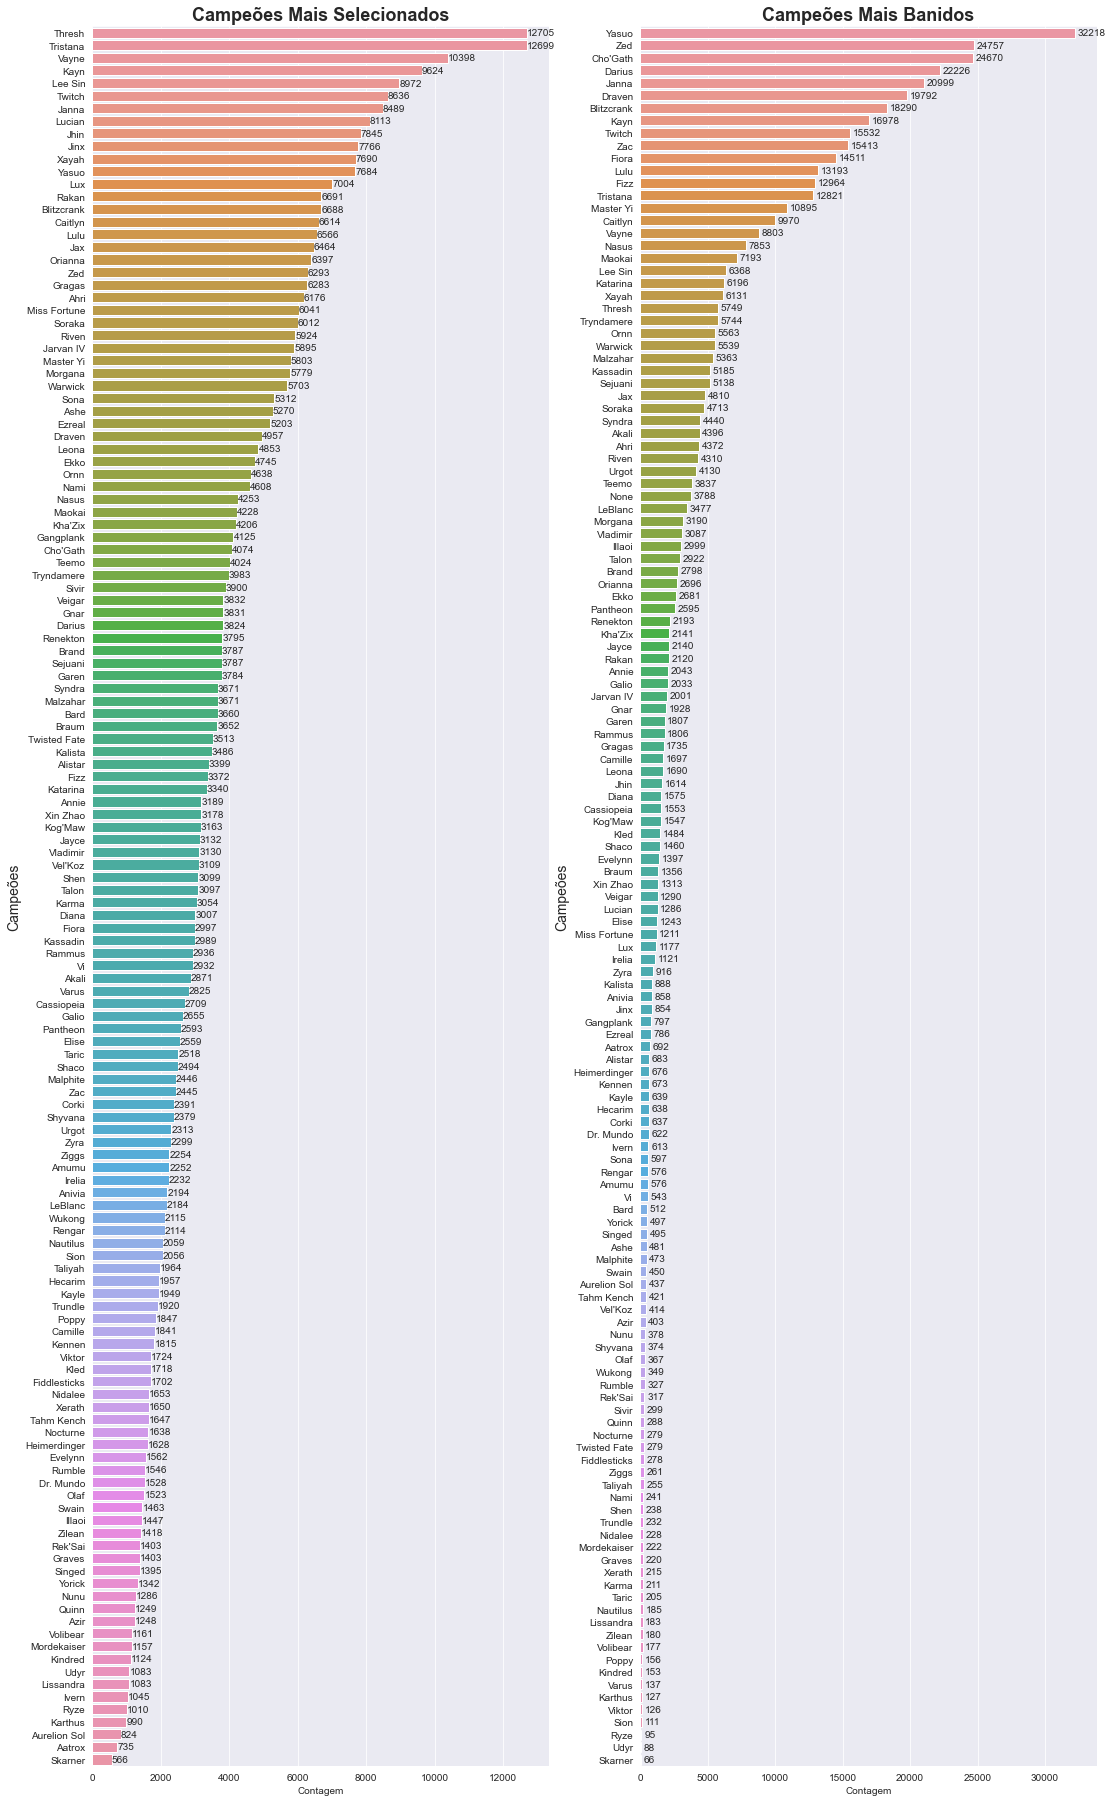

In [57]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, nrows= 1, sharey = False, figsize= (18,32))

ax1 = sns.barplot(data = pickCols, x = pickCols.value_counts(), y = pickCols.value_counts().index, ax = ax1, orient = 'h')
ax2 = sns.barplot(data = banCols, x = banCols.value_counts(), y = banCols.value_counts().index, ax = ax2, orient= 'h')

initialx1 = 0
initialx2 = 0

for p in ax1.patches:
    ax1.text(p.get_width(),(p.get_height()/139)+(initialx1+0.2), '{:1.0f}'.format(p.get_width()))
    initialx1 += 1

for p in ax2.patches:
    ax2.text(p.get_width()+200,(p.get_height()/139)+(initialx2+0.2), '{:1.0f}'.format(p.get_width()))
    initialx2 += 1


ax1.set_ylabel('Campeões', fontdict={'fontsize': 14})
ax1.set_xlabel('Contagem')
ax1.set_title('Campeões Mais Selecionados', fontdict={'fontsize': 18}, fontweight = 'bold')

ax2.set_ylabel('Campeões', fontdict={'fontsize': 14})
ax2.set_xlabel('Contagem')
ax2.set_title('Campeões Mais Banidos', fontdict={'fontsize': 18}, fontweight = 'bold')

### Summoners Spells mais usadas

In [58]:
df[sumCols].columns

Index(['t1_champ1_sum1', 't1_champ1_sum2', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4_sum1', 't1_champ4_sum2',
       't1_champ5_sum1', 't1_champ5_sum2', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3_sum1', 't2_champ3_sum2',
       't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5_sum1', 't2_champ5_sum2'],
      dtype='object')

In [59]:
# Fazer o concat do df
sumSummon = pd.concat([df['t1_champ1_sum1'], df['t1_champ1_sum2'], df['t1_champ2_sum1'], df['t1_champ2_sum2'],
       df['t1_champ3_sum1'], df['t1_champ3_sum2'], df['t1_champ4_sum1'], df['t1_champ4_sum2'],
       df['t1_champ5_sum1'], df['t1_champ5_sum2'], df['t2_champ1_sum1'], df['t2_champ1_sum2'],
       df['t2_champ2_sum1'], df['t2_champ2_sum2'], df['t2_champ3_sum1'], df['t2_champ3_sum2'],
       df['t2_champ4_sum1'], df['t2_champ4_sum2'], df['t2_champ5_sum1'], df['t2_champ5_sum2']], axis = 0, sort = True)

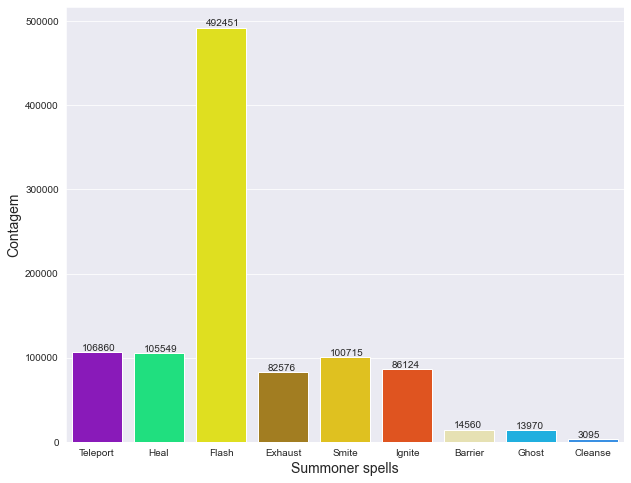

In [60]:
plt.figure(figsize=(10,8))

# Spell colors
spellColors = ['darkviolet', 'springgreen', 'yellow', 'darkgoldenrod', 'gold', 'orangered','palegoldenrod', 'deepskyblue','dodgerblue']
#palette = 'bright'
ax = sns.countplot(x = sumSummon, palette = spellColors)
plt.xlabel('Summoner spells', fontdict={'fontsize': 14})
plt.ylabel('Contagem', fontdict={'fontsize': 14})

count = 0
for p in ax.patches:
    ax.text(p.get_width()+(count-1.05), p.get_height()+2000 ,p.get_height())
    count+=1

plt.show()

In [61]:
ax.patches

Como era imaginado, a maioria dos jogadores usam flash em suas partidas!  
Já as spells menos usadas foram o Cleanse, Ghost e Barrier


### Tipos de Campões que mais aparecem (tags)

In [62]:
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [63]:
champTags = ['t1_champ1id_tag', 't1_champ2id_tag', 't1_champ3id_tag',
       't1_champ4id_tag', 't1_champ5id_tag', 't2_champ1id_tag',
       't2_champ2id_tag', 't2_champ3id_tag', 't2_champ4id_tag',
       't2_champ5id_tag']

In [64]:
df[champTags].head()

,t1_champ1id_tag,t1_champ2id_tag,t1_champ3id_tag,t1_champ4id_tag,t1_champ5id_tag,t2_champ1id_tag,t2_champ2id_tag,t2_champ3id_tag,t2_champ4id_tag,t2_champ5id_tag
0,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


In [65]:
sumTags = pd.concat([df['t1_champ1id_tag'],df['t1_champ2id_tag'],df['t1_champ3id_tag'],df['t1_champ4id_tag'],df['t1_champ5id_tag'],df['t2_champ1id_tag'],
df['t2_champ2id_tag'],df['t2_champ3id_tag'],df['t2_champ4id_tag'],df['t2_champ5id_tag']], axis = 0, sort = True)
sumTags

0            Mage
1        Marksman
2        Marksman
3            Tank
4         Fighter
           ...   
51485     Fighter
51486        Mage
51487        Mage
51488    Assassin
51489     Fighter
Length: 502950, dtype: object

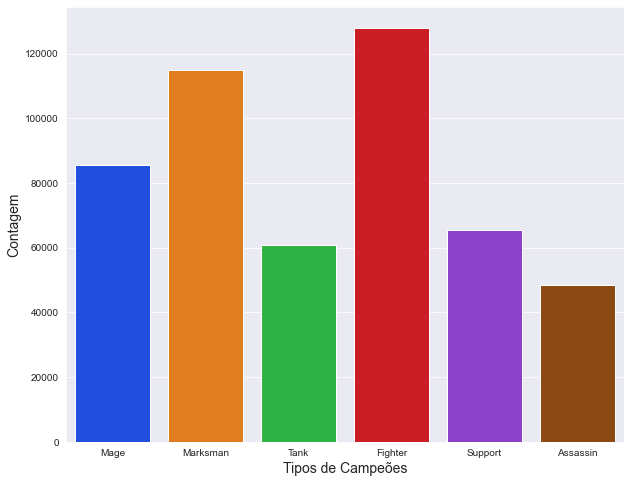

In [66]:
plt.figure(figsize=(10,8))

sns.set_style('darkgrid')

sns.countplot(x = sumTags, palette = 'bright')
plt.xlabel('Tipos de Campeões', fontdict={'fontsize': 14})
plt.ylabel('Contagem', fontdict={'fontsize': 14})

plt.show()

Podemos ver que os tipos de campões que mais aparecem são os Lutadores e os Atiradores, o que faz sentido pois esses dois tipos de campeões tem espaços em basicamente todas as rotas, enquanto os que menos aparecem são os Assassinos, que costumam aparecer com mais frequencia apenas na rota do meio.

### Qual lado tem maior taxa de vitória, Azul ou Vermelho?

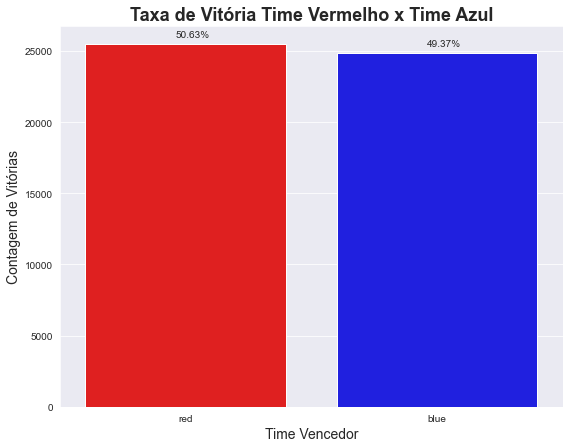

In [67]:
plt.figure(figsize=(9,7))

cores = ['red','blue']

ax = sns.countplot(data = df, x = 'winner', palette = cores)


for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height()*100)/len(df)), (p.get_x()+.36, p.get_height()+500))

    plt.title('Taxa de Vitória Time Vermelho x Time Azul',fontdict={'fontsize': 18}, fontweight = 'bold')
    plt.xlabel('Time Vencedor', fontdict={'fontsize': 14})
    plt.ylabel('Contagem de Vitórias', fontdict={'fontsize': 14})

Apesar de o time vermelho ter uma leve taxa de vitória a mais, podemos ver que ambos os lados são bem equilibrados

## Quem fica com os primeiros objetivos? Quem ganha ou quem perde as partidas?

In [68]:
df.head(5)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tag,t1_champ2id_tag,t1_champ3id_tag,t1_champ4id_tag,t1_champ5id_tag,t2_champ1id_tag,t2_champ2id_tag,t2_champ3id_tag,t2_champ4id_tag,t2_champ5id_tag
0,3326086514,1504279457970,1949,9,red,blue,red,red,red,red,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,red,red,red,red,neither,red,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,red,blue,red,red,red,blue,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,red,red,red,red,red,red,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,red,blue,red,red,red,red,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


In [69]:
# quero saber quantas vezes o vencedor e o perdedor conseguiu o objetivo de primeira torre
winner = df[(df.winner == df.firstTower)]
loser = df[(df.winner != df.firstTower)]
neither = df[(df.firstTower == 'neither')]

In [70]:
print(f'O time que venceu conquistou a primeira torre {len(winner)}({round(len(winner)/len(df)*100,2)}%) das vezes')
print(f'O time que perdeu conquistou a primeira torre {len(loser)}({round(len(loser)/len(df)*100,2)}%) das vezes')

O time que venceu conquistou a primeira torre 35607(70.8%) das vezes
O time que perdeu conquistou a primeira torre 14688(29.2%) das vezes


In [71]:
# Para plotar esses dados, vamos adicioná-los em outra tabela.
df_ft = pd.DataFrame([len(winner), (len(loser)-len(neither)), len(neither)], columns = ['First_Tower'],
index = ['Winner Team', 'Loser Team', 'Neither Team'])
df_ft

,First_Tower
Winner Team,35607
Loser Team,14670
Neither Team,18


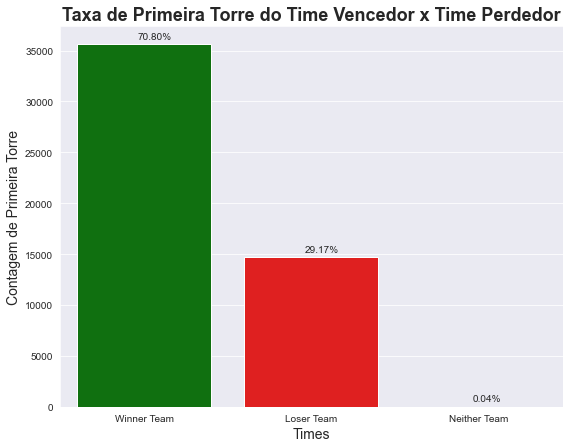

In [72]:
plt.figure(figsize=(9,7))

cores = ['green', 'red', 'gray']

ax = sns.barplot(data = df_ft, x= df_ft.index ,y = 'First_Tower', palette = cores, orient= 'v')


for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height()*100)/len(df)), (p.get_x()+.36, p.get_height()+500)) # ax.anottate(str, (coord x,y))

    plt.title('Taxa de Primeira Torre do Time Vencedor x Time Perdedor',fontdict={'fontsize': 18}, fontweight = 'bold')
    plt.xlabel('Times', fontdict={'fontsize': 14})
    plt.ylabel('Contagem de Primeira Torre', fontdict={'fontsize': 14})

### Vamos trazer agora essa mesma informação para as colunas:  
### firstBlood, firstInhibitor, firstBaron, firstDragon, firstRiftHerald

In [73]:
# Agora uma maneira de fazer isso de uma vez só para as seguintes colunas
cols = ['firstBlood','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']

In [74]:
df_firsts = pd.DataFrame(index = ['Winner Team', 'Loser Team', 'Neither Team'])

for i in range(0, len(cols)):

    winner = df[(df['winner'] == df[cols[i]])]
    loser = df[(df['winner'] != df[cols[i]])] # Aqui tenho que fzr esse valor e subtrair os valores onde a coluna == 'neither'
    neither = df[(df[cols[i]] == 'neither')]
    
    #pd.insert(loc, column, value)
    df_firsts.insert(i, cols[i], value = [len(winner), (len(loser)-len(neither)), len(neither)])



In [75]:
df_firsts

,firstBlood,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
Winner Team,29703,41191,25197,33669,17581
Loser Team,20592,4023,6035,15820,7730
Neither Team,0,5081,19063,806,24984


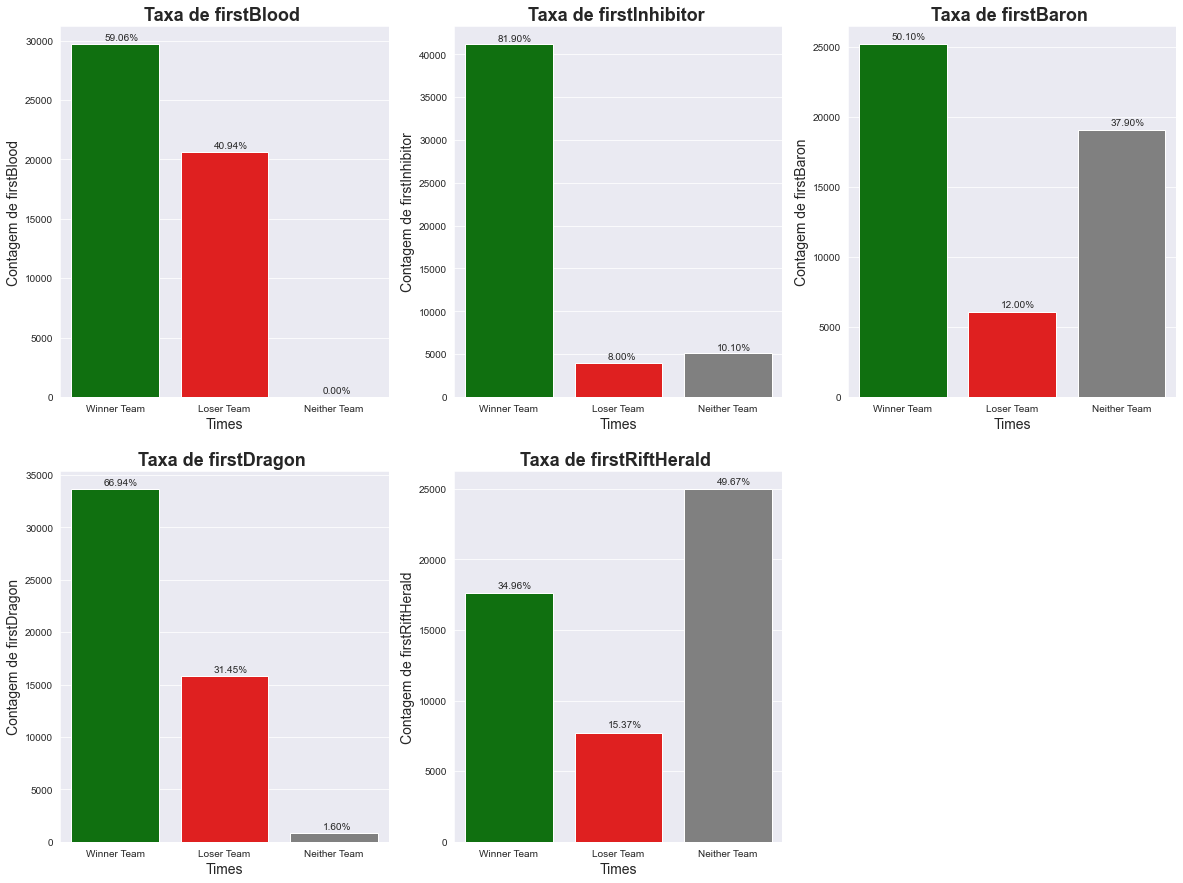

In [76]:
# Agora precisamos plotar esses dados
plt.figure(figsize=(20,15))

cores = ['green', 'red', 'grey']

for i in range(0, len(cols)):
    
    plt.subplot(2, 3, i+1)

    ax = sns.barplot(data = df_firsts, x=df_firsts.index ,y = df_firsts[cols[i]] ,palette= cores)

    for p in ax.patches:
        ax.annotate('{:.2f}%'.format((p.get_height()*100)/len(df)), (p.get_x()+0.30, p.get_height()+350)) # ax.anottate(str, (coord x,y))

        plt.title(f'Taxa de {cols[i]} ',fontdict={'fontsize': 18}, fontweight = 'bold')
        plt.xlabel('Times', fontdict={'fontsize': 14})
        plt.ylabel(f'Contagem de {cols[i]}', fontdict={'fontsize': 14})

* Em aproximadamente 60% das vezes que um time da o First Blood, ele vence.

* Apenas em 8% das partidas um time leva o primeiro inibidor primeiro e perde o jogo.   

* Apenas 12% das partidas o time perdedor faz o primeiro Barão.  

* O primeiro Dragão é feito pelo time vencedor em mais de dois terços das partidas.

* Em aproximadamente 50% dos jogos o Herald não é feito

### Sabemos que o arauto tem o poder de destruir torres facilmente. Qual é a relação de times que fazem arauto com a destruição de primeiras torres?

In [77]:
# Registros onde o time que matou o arauto tbm destruiu a primeira torre
sim = df[(df.firstRiftHerald == df.firstTower)]
neither = df[(df.firstRiftHerald == 'neither')]
nao = df[(df.firstRiftHerald != df.firstTower)]

In [78]:
print(len(sim))
print(len(nao)-len(neither))
print(len(neither))

18266
7045
24984


In [79]:
# Vamos vamos colocar esses dados em DataFrame
heraldTower = pd.DataFrame([len(sim), (len(nao) - len(neither))], columns= ['First Herald & Tower'], index = ['Sim','Não'])
heraldTower

,First Herald & Tower
Sim,18266
Não,7045


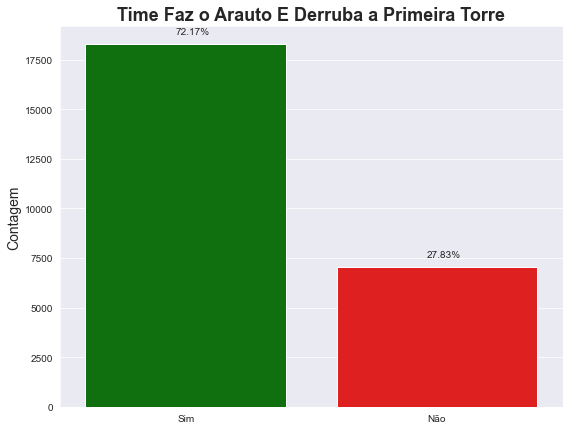

In [80]:
plt.figure(figsize=(9,7))

cores = ['green', 'red']

ax= sns.barplot(data = heraldTower, x = heraldTower.index, y = heraldTower['First Herald & Tower'], palette = cores)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height()*100)/(len(df)-len(neither))),  (p.get_x() + 0.36, p.get_height()+ 500)) # ax.anottate(str, (coord x,y))


    plt.title('Time Faz o Arauto E Derruba a Primeira Torre',fontdict={'fontsize': 18}, fontweight = 'bold')
    plt.xlabel('', fontdict={'fontsize': 14})
    plt.ylabel('Contagem', fontdict={'fontsize': 14})

Como era esperado, a maioria dos times que fazem o Arauto também levam a Primeira Torre

### Média de Objetivos feitos de Times Vencedores e Perdedores

In [81]:
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tag,t1_champ2id_tag,t1_champ3id_tag,t1_champ4id_tag,t1_champ5id_tag,t2_champ1id_tag,t2_champ2id_tag,t2_champ3id_tag,t2_champ4id_tag,t2_champ5id_tag
0,3326086514,1504279457970,1949,9,red,blue,red,red,red,red,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,red,red,red,red,neither,red,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,red,blue,red,red,red,blue,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,red,red,red,red,red,red,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,red,blue,red,red,red,red,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


In [82]:
df[['t1_towerKills', 't1_inhibitorKills', 't1_baronKills','t1_dragonKills','t2_towerKills', 't2_inhibitorKills', 't2_baronKills','t2_dragonKills']]

,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills
0,11,1,2,3,5,0,0,1
1,10,4,0,2,2,0,0,0
2,8,1,1,1,2,0,0,1
3,9,2,1,2,0,0,0,0
4,9,2,1,3,3,0,0,1
...,...,...,...,...,...,...,...,...
51485,2,0,0,0,10,2,0,4
51486,5,4,0,2,11,7,4,4
51487,0,0,0,1,10,2,0,2
51488,0,0,0,0,11,3,0,1


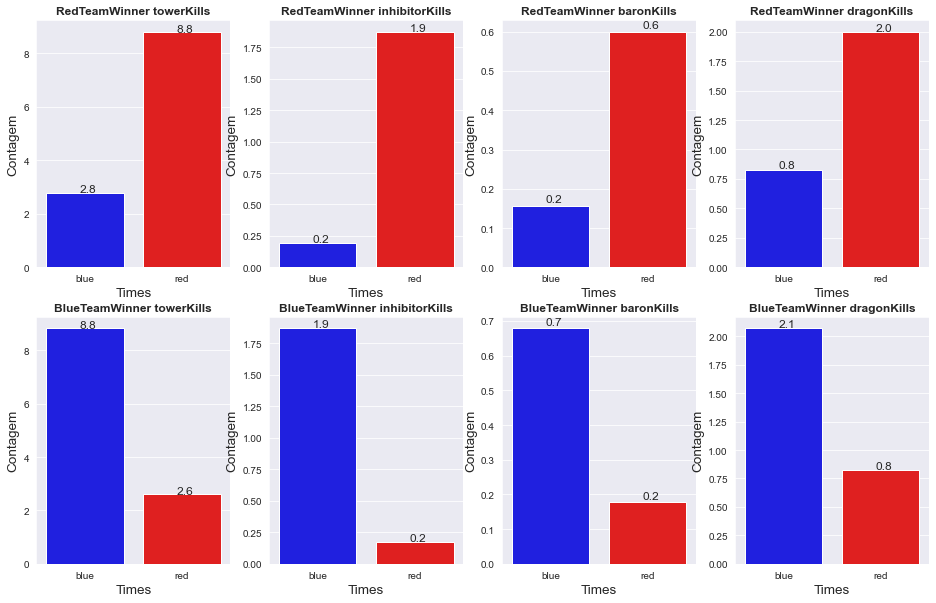

In [83]:
plt.figure(figsize=(16,10))

dfObj = pd.DataFrame()
cols = ['t1_towerKills', 't1_inhibitorKills', 't1_baronKills','t1_dragonKills',
        't2_towerKills', 't2_inhibitorKills', 't2_baronKills','t2_dragonKills']

for i in range(0, len(cols)):

    t = df.groupby('winner').agg({cols[i]: 'mean'})


    plt.subplot(2,4, i+1)

    ax = sns.barplot(data = t, x = t.index, y = t[cols[i]], palette = ['blue', 'red'])

    # Alterando o nome da coluna
    t.columns = t.columns.str.replace('t1_', 'RedTeamWinner ')
    t.columns = t.columns.str.replace('t2_', 'BlueTeamWinner ')

    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.01), fontsize = 12)

        plt.title(f'{t.columns[0]}',fontdict={'fontsize': 12}, fontweight = 'bold')
        plt.xlabel('Times', fontdict={'fontsize': 13.5})
        plt.ylabel('Contagem', fontdict={'fontsize': 13.5})

Ambos os lados possuem uma média de objetivos quando vencem e quando perdem muito semelhantes.


# Machine Learning

A partir de agora o objetivo será fazer um modelo preditivo que consiga prever qual time vencerá a partida!

In [85]:
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tag,t1_champ2id_tag,t1_champ3id_tag,t1_champ4id_tag,t1_champ5id_tag,t2_champ1id_tag,t2_champ2id_tag,t2_champ3id_tag,t2_champ4id_tag,t2_champ5id_tag
0,3326086514,1504279457970,1949,9,red,blue,red,red,red,red,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,red,red,red,red,neither,red,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,red,blue,red,red,red,blue,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,red,red,red,red,red,red,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,red,blue,red,red,red,red,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


In [86]:
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

Para ser possível usarmos o dataset para ML, precisamos desfazer algumas das mudanças que fizemos para análisar os dados, visto que os dados precisam ser entregue ao algoritmo em forma de numero